In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K

from keras.models import load_model 
from keras.preprocessing import image 
import numpy as np 
from os import listdir 
from os.path import isfile, join

In [2]:
img_width = 32
img_height = 32

train_data_dir = 'facemask801010/train'
validation_data_dir = 'facemask801010/validation'
test_data_dir = 'facemask801010/test'
train_samples = 800
validation_samples = 100
epochs=10
batch_size = 8

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),batch_size=batch_size,
    class_mode='binary', shuffle = True)

Found 800 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),class_mode='binary', shuffle = True)

Found 100 images belonging to 2 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
    target_size=(img_width, img_height),
    class_mode='binary', shuffle = False)

Found 100 images belonging to 2 classes.


In [7]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


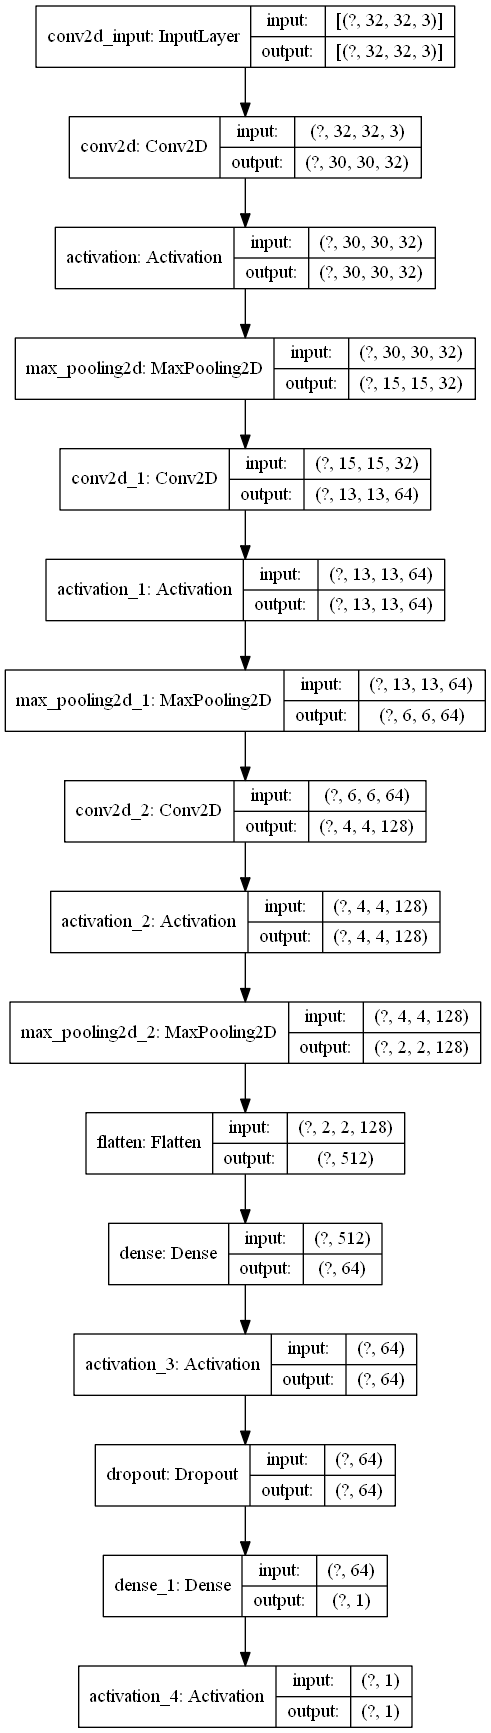

In [10]:
from IPython.display import Image 
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [11]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [12]:
History = model.fit_generator(
    train_generator,
    #steps_per_epoch=train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator)#,
    #validation_steps=validation_samples // batch_size)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 2s 23ms/step - loss: 0.6066 - accuracy: 0.7550 - val_loss: 0.4047 - val_accuracy: 0.9800
Epoch 2/10
100/100 [==============================] - 2s 15ms/step - loss: 0.2609 - accuracy: 0.9513 - val_loss: 0.1010 - val_accuracy: 0.9800
Epoch 3/10
100/100 [==============================] - 2s 19ms/step - loss: 0.1136 - accuracy: 0.9737 - val_loss: 0.0464 - val_accuracy: 0.9800
Epoch 4/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0934 - accuracy: 0.9675 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0897 - accuracy: 0.9737 - val_loss: 0.0514 - val_accuracy: 0.9800
Epoch 6/10
100/100 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.97 - 2s 18ms/step - loss: 0.0739 - accuracy: 0.9762 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 7/10
100/100 [====

In [13]:
test_loss, test_acc = model.evaluate(validation_generator, verbose = 2)
print('\nTest Accuracy :', test_acc)

4/4 - 0s - loss: 0.0809 - accuracy: 0.9700

Test Accuracy : 0.9700000286102295


In [14]:
model.save("CNNFaceMaskSigmoid.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [13]:
model.save('cnnfacemask.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


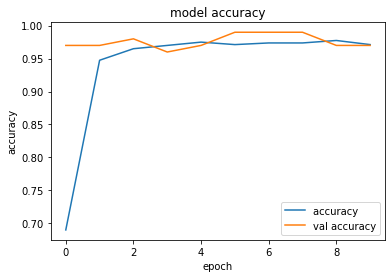

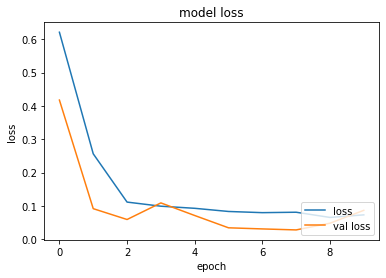

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(History.history.keys())
# summarize history for accuracy
plt.plot(History.history['accuracy'],label='accuracy ')
plt.plot(History.history['val_accuracy'],label='val accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'], label = 'loss')
plt.plot(History.history['val_loss'],label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [16]:
#get list of layer from model
layer_outputs = [layer.output for layer in model.layers[1:]]

In [17]:
import tensorflow
#create visualization model
visualize_model = tensorflow.keras.models.Model(inputs=model.input , outputs = layer_outputs)


In [18]:
#MEMPREDIKSI SEBUAH GAMBAR TUNGGAL

In [19]:
import tensorflow as tf
load_model = tf.keras.models.load_model('cnnfacemask.h5')
#load_model.layers[0].input_shape

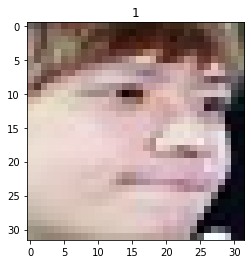

In [25]:
image_path="12.jpg"
img = image.load_img(image_path, target_size=(32,32))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=load_model.predict_classes(img)
plt.title((result[0][0]))
plt.show()

In [23]:
#show name of layers availabe in model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'activation', 'max_pooling2d', 'conv2d_1', 'activation_1', 'max_pooling2d_1', 'conv2d_2', 'activation_2', 'max_pooling2d_2', 'flatten', 'dense', 'activation_3', 'dropout', 'dense_1', 'activation_4']


In [24]:
model.layers

In [25]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d/BiasAdd:0' shape=(None, 30, 30, 32) dtype=float32>,
 <tf.Tensor 'activation/Relu:0' shape=(None, 30, 30, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/BiasAdd:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(None, 4, 4, 128) dtype=float32>,
 <tf.Tensor 'activation_2/Relu:0' shape=(None, 4, 4, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 2, 2, 128) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense/BiasAdd:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'activation_3/Relu:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dropout/cond/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_1/BiasAdd:0' shape=(None, 1) dtype=

In [26]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
filters = model.layers[2].get_weights()

In [28]:
print(filters)

[]


conv2d
32


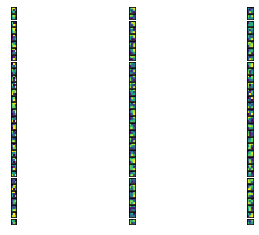

conv2d_1
64


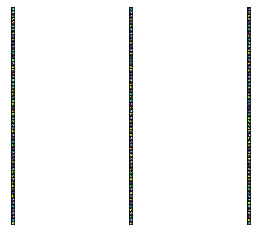

conv2d_2
128


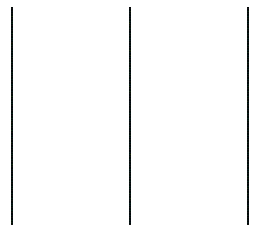

In [29]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

(1, 30, 30, 32)
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)

<ipython-input-33-e945a14cbf16>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()



(1, 512)
(1, 64)
(1, 64)
(1, 64)
(1, 1)
(1, 1)


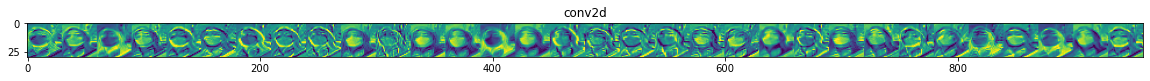

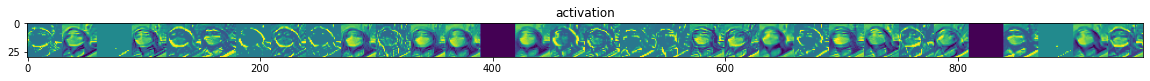

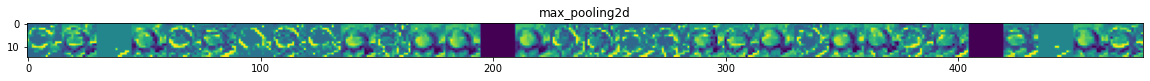

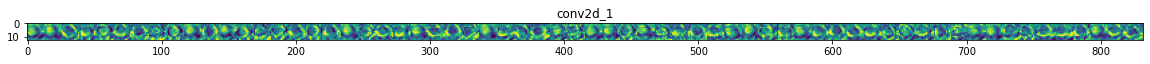

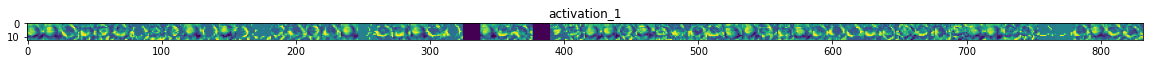

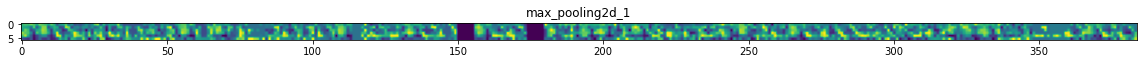

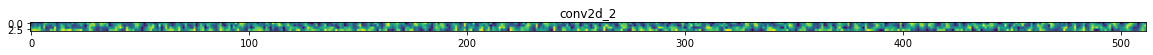

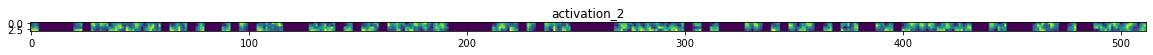

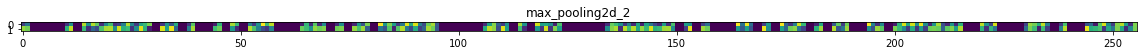

In [33]:
img_path='mask.3.jpg' #mask
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
#visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
import tensorflow
#create visualization model
visualization_model = tensorflow.keras.models.Model(inputs=model.input , outputs = layer_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [174]:
#1. CONFUSION MATRIX AND CLASSIFICATION REPORT
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))

    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="cyan" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [175]:
#Print the Target names

target_names = []
for key in validation_generator.class_indices:
#.class_indices:
    target_names.append(key)

print(target_names)

['mask', 'nomask']


Confusion matrix, without normalization


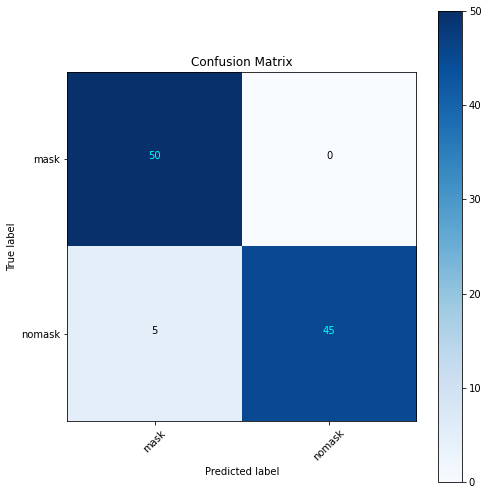

In [176]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5,1,0)
#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [177]:
#CLASSIFICATION REPORT 
from sklearn.metrics import classification_report, confusion_matrix
import itertools  

#predictedClasses = np.where(predictions>0.5, 1, 0) #instead of np.argmax(Y_pred, axis=1)
Y_pred = model.predict(test_generator)
#y_pred = np.argmax(Y_pred, axis = 1)
y_pred = np.where(Y_pred > 0.5, 1, 0)#.astype('int32')
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

        mask       0.91      1.00      0.95        50
      nomask       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [178]:
print(confusion_matrix(test_generator.classes, y_pred))

[[50  0]
 [ 5 45]]


In [35]:
## Now Predict
predict_dir_path='facemask801010/test/mask/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['mask.449.jpg', 'mask.450.jpg', 'mask.451.jpg', 'mask.452.jpg', 'mask.453.jpg', 'mask.454.jpg', 'mask.455.jpg', 'mask.456.jpg', 'mask.457.jpg', 'mask.458.jpg', 'mask.459.jpg', 'mask.460.jpg', 'mask.461.jpg', 'mask.462.jpg', 'mask.463.jpg', 'mask.464.jpg', 'mask.465.jpg', 'mask.466.jpg', 'mask.467.jpg', 'mask.468.jpg', 'mask.469.jpg', 'mask.470.jpg', 'mask.471.jpg', 'mask.472.jpg', 'mask.473.jpg', 'mask.474.jpg', 'mask.475.jpg', 'mask.476.jpg', 'mask.477.jpg', 'mask.478.jpg', 'mask.479.jpg', 'mask.480.jpg', 'mask.481.jpg', 'mask.482.jpg', 'mask.483.jpg', 'mask.484.jpg', 'mask.485.jpg', 'mask.486.jpg', 'mask.487.jpg', 'mask.488.jpg', 'mask.489.jpg', 'mask.490.jpg', 'mask.491.jpg', 'mask.492.jpg', 'mask.493.jpg', 'mask.494.jpg', 'mask.495.jpg', 'mask.496.jpg', 'mask.497.jpg', 'mask.498.jpg']


In [36]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
mask.449.jpg: mask
mask.450.jpg: mask
mask.451.jpg: mask
mask.452.jpg: mask
mask.453.jpg: mask
mask.454.jpg: mask
mask.455.jpg: mask
mask.456.jpg: mask
mask.457.jpg: mask
mask.458.jpg: mask
mask.459.jpg: mask
mask.460.jpg: mask
mask.461.jpg: mask
mask.462.jpg: mask
mask.463.jpg: mask
mask.464.jpg: mask
mask.465.jpg: mask
mask.466.jpg: mask
mask.467.jpg: mask
mask.468.jpg: mask
mask.469.jpg: mask
mask.470.jpg: mask
mask.471.jpg: mask
mask.472.jpg: mask
mask.473.jpg: mask
mask.474.jpg: mask
mask.475.jpg: mask
mask.476.jpg: mask
mask.477.jpg: mask
mask.478.jpg: mask
mask.479.jpg: mask
mask.480.jpg: mask
mask.481.jpg: mask
mask.482.jpg: mask
mask.483.jpg: mask
m

In [39]:
## Now Predict
predict_dir_path='facemask801010/test/nomask/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['nomask.0.jpg', 'nomask.1.jpg', 'nomask.10.jpg', 'nomask.11.jpg', 'nomask.12.jpg', 'nomask.13.jpg', 'nomask.14.jpg', 'nomask.15.jpg', 'nomask.16.jpg', 'nomask.17.jpg', 'nomask.18.jpg', 'nomask.19.jpg', 'nomask.2.jpg', 'nomask.20.jpg', 'nomask.21.jpg', 'nomask.22.jpg', 'nomask.23.jpg', 'nomask.24.jpg', 'nomask.25.jpg', 'nomask.26.jpg', 'nomask.27.jpg', 'nomask.28.jpg', 'nomask.29.jpg', 'nomask.3.jpg', 'nomask.30.jpg', 'nomask.31.jpg', 'nomask.32.jpg', 'nomask.33.jpg', 'nomask.34.jpg', 'nomask.35.jpg', 'nomask.36.jpg', 'nomask.37.jpg', 'nomask.38.jpg', 'nomask.39.jpg', 'nomask.4.jpg', 'nomask.40.jpg', 'nomask.41.jpg', 'nomask.42.jpg', 'nomask.43.jpg', 'nomask.44.jpg', 'nomask.45.jpg', 'nomask.46.jpg', 'nomask.47.jpg', 'nomask.48.jpg', 'nomask.49.jpg', 'nomask.5.jpg', 'nomask.6.jpg', 'nomask.7.jpg', 'nomask.8.jpg', 'nomask.9.jpg']


In [37]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

mask.449.jpg: mask
mask.450.jpg: mask
mask.451.jpg: mask
mask.452.jpg: mask
mask.453.jpg: mask
mask.454.jpg: mask
mask.455.jpg: mask
mask.456.jpg: mask
mask.457.jpg: mask
mask.458.jpg: mask
mask.459.jpg: mask
mask.460.jpg: mask
mask.461.jpg: mask
mask.462.jpg: mask
mask.463.jpg: mask
mask.464.jpg: mask
mask.465.jpg: mask
mask.466.jpg: mask
mask.467.jpg: mask
mask.468.jpg: mask
mask.469.jpg: mask
mask.470.jpg: mask
mask.471.jpg: mask
mask.472.jpg: mask
mask.473.jpg: mask
mask.474.jpg: mask
mask.475.jpg: mask
mask.476.jpg: mask
mask.477.jpg: mask
mask.478.jpg: mask
mask.479.jpg: mask
mask.480.jpg: mask
mask.481.jpg: mask
mask.482.jpg: mask
mask.483.jpg: mask
mask.484.jpg: mask
mask.485.jpg: mask
mask.486.jpg: mask
mask.487.jpg: mask
mask.488.jpg: mask
mask.489.jpg: mask
mask.490.jpg: mask
mask.491.jpg: mask
mask.492.jpg: mask
mask.493.jpg: mask
mask.494.jpg: mask
mask.495.jpg: mask
mask.496.jpg: mask
mask.497.jpg: mask
mask.498.jpg: mask
Total Mask : 50
Total Nomask : 0


In [38]:
## Now Predict
predict_dir_path='facemask801010/coba/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1(maskerdidagu).jpg', '7384aef5-e918-48f0-a8da-36b99c78116d.jpeg', 'download (1).jpg', 'download.jpg', 'predict2.png']


In [39]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

1(maskerdidagu).jpg: mask
7384aef5-e918-48f0-a8da-36b99c78116d.jpeg: mask
download (1).jpg: mask
download.jpg: mask
predict2.png: mask
Total Mask : 5
Total Nomask : 0


In [26]:
predict_dir_path='facemask801010/test2/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['mask.449.jpg', 'mask.450.jpg', 'mask.451.jpg', 'mask.452.jpg', 'mask.453.jpg', 'mask.454.jpg', 'mask.455.jpg', 'mask.456.jpg', 'mask.457.jpg', 'mask.458.jpg', 'mask.459.jpg', 'mask.460.jpg', 'mask.461.jpg', 'mask.462.jpg', 'mask.463.jpg', 'mask.464.jpg', 'mask.465.jpg', 'mask.466.jpg', 'mask.467.jpg', 'mask.468.jpg', 'mask.469.jpg', 'mask.470.jpg', 'mask.471.jpg', 'mask.472.jpg', 'mask.473.jpg', 'mask.474.jpg', 'mask.475.jpg', 'mask.476.jpg', 'mask.477.jpg', 'mask.478.jpg', 'mask.479.jpg', 'mask.480.jpg', 'mask.481.jpg', 'mask.482.jpg', 'mask.483.jpg', 'mask.484.jpg', 'mask.485.jpg', 'mask.486.jpg', 'mask.487.jpg', 'mask.488.jpg', 'mask.489.jpg', 'mask.490.jpg', 'mask.491.jpg', 'mask.492.jpg', 'mask.493.jpg', 'mask.494.jpg', 'mask.495.jpg', 'mask.496.jpg', 'mask.497.jpg', 'mask.498.jpg', 'nomask.0.jpg', 'nomask.1.jpg', 'nomask.10.jpg', 'nomask.11.jpg', 'nomask.12.jpg', 'nomask.13.jpg', 'nomask.14.jpg', 'nomask.15.jpg', 'nomask.16.jpg', 'nomask.17.jpg', 'nomask.18.jpg', 'nomask.19.jpg

In [27]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

mask.449.jpg: mask
mask.450.jpg: mask
mask.451.jpg: mask
mask.452.jpg: mask
mask.453.jpg: mask
mask.454.jpg: mask
mask.455.jpg: mask
mask.456.jpg: mask
mask.457.jpg: mask
mask.458.jpg: mask
mask.459.jpg: mask
mask.460.jpg: mask
mask.461.jpg: mask
mask.462.jpg: mask
mask.463.jpg: mask
mask.464.jpg: mask
mask.465.jpg: mask
mask.466.jpg: mask
mask.467.jpg: mask
mask.468.jpg: mask
mask.469.jpg: mask
mask.470.jpg: mask
mask.471.jpg: mask
mask.472.jpg: mask
mask.473.jpg: mask
mask.474.jpg: mask
mask.475.jpg: mask
mask.476.jpg: mask
mask.477.jpg: mask
mask.478.jpg: mask
mask.479.jpg: mask
mask.480.jpg: mask
mask.481.jpg: mask
mask.482.jpg: mask
mask.483.jpg: mask
mask.484.jpg: mask
mask.485.jpg: mask
mask.486.jpg: mask
mask.487.jpg: mask
mask.488.jpg: mask
mask.489.jpg: mask
mask.490.jpg: mask
mask.491.jpg: mask
mask.492.jpg: mask
mask.493.jpg: mask
mask.494.jpg: mask
mask.495.jpg: mask
mask.496.jpg: mask
mask.497.jpg: mask
mask.498.jpg: mask
nomask.0.jpg: nomask
nomask.1.jpg: nomask
nomask.1